<a href="https://www.kaggle.com/code/ahmadibraheeem/sentiment-driven-stock-forecasting?scriptVersionId=149904674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction:
#### In this project, we will perform sentiment analysis on news headlines related to stock market data. We aim to extract and analyze sentiment from news articles and visualize the sentiment trends for specific stocks and dates. To achieve this, we will follow a series of data preprocessing, sentiment analysis, and data visualization steps.

#### Importing and Parsing HTML Tables:
We start by importing the necessary libraries, including BeautifulSoup, to parse HTML content. We iterate through a folder of HTML files containing news articles, extract the tables with the "news-table" id, and store them in a dictionary for further analysis.

In [1]:
# Import libraries
from bs4 import BeautifulSoup
import os

html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir('/kaggle/input/stock-sentiments'):
    #this is the path to the file. Don't touch!
    table_path = f'/kaggle/input/stock-sentiments/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path, 'r')
    # Read the contents of the file into 'html'
    html = BeautifulSoup(table_file)
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id="news-table")
    # Add the table to our dictionary
    html_tables[table_name] = html_table

#### Extracting and Printing Headlines:
Next, we focus on one specific day of headlines, in this case, those related to Tesla (TSLA). We extract and print the headlines and their associated data for analysis. This step allows us to examine the content of the news articles.

In [2]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.findAll('tr')

# For each row...
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'File number {i+1}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:
        break

File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  
File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


#### Parsing News Data:
We create a list to hold parsed news data. We iterate through all the HTML tables, extracting headlines, dates, times, and tickers. This data is then organized into a list of lists, making it suitable for sentiment analysis.

In [3]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.a.get_text() 
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time= date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])

#### Sentiment Analysis with NLTK VADER:
We perform sentiment analysis using the NLTK VADER tool. New words and their associated sentiment values are added to the lexicon. We calculate sentiment scores for the news headlines, considering both positive and negative sentiments.

In [4]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### Creating a DataFrame and Visualizing Sentiment:
We use pandas to create a DataFrame from the parsed news data. Sentiment scores are calculated using VADER and added as columns to the DataFrame. We group the data by date and ticker, and then visualize the mean compound sentiment for each date and ticker with a bar chart.

In [5]:
import pandas as pd
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(headline) for headline in scored_news.headline]
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
scored_news.columns = columns
# Join the DataFrames
scored_news = scored_news.join(scores_df)
scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.000,0.631,0.369,0.4767
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.000,1.000,0.000,0.0000
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.000,1.000,0.000,0.0000
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,0.000,1.000,0.000,0.0000
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,0.000,0.698,0.302,0.3818
...,...,...,...,...,...,...,...,...
495,tsla,Nov-16-18,08:31AM,VW says could build up to 15 million electric ...,0.000,1.000,0.000,0.0000
496,tsla,Nov-16-18,08:12AM,Elon Musk to Prowl Production Lines in Push fo...,0.000,1.000,0.000,0.0000
497,tsla,Nov-16-18,06:39AM,Tesla cuts prices on solar power systems as it...,0.155,0.845,0.000,-0.2960
498,tsla,Nov-16-18,06:00AM,Tesla Stretch Pushes Customers to Open Wallets...,0.000,1.000,0.000,0.0000


#### Selecting and Visualizing Sentiment for a Specific Date:
We select and visualize the sentiment for a specific date, such as January 3, 2019, for a specific stock, in this case, Facebook (FB). We create a stacked bar chart to visualize the negative, neutral, and positive sentiments for that specific date and stock.

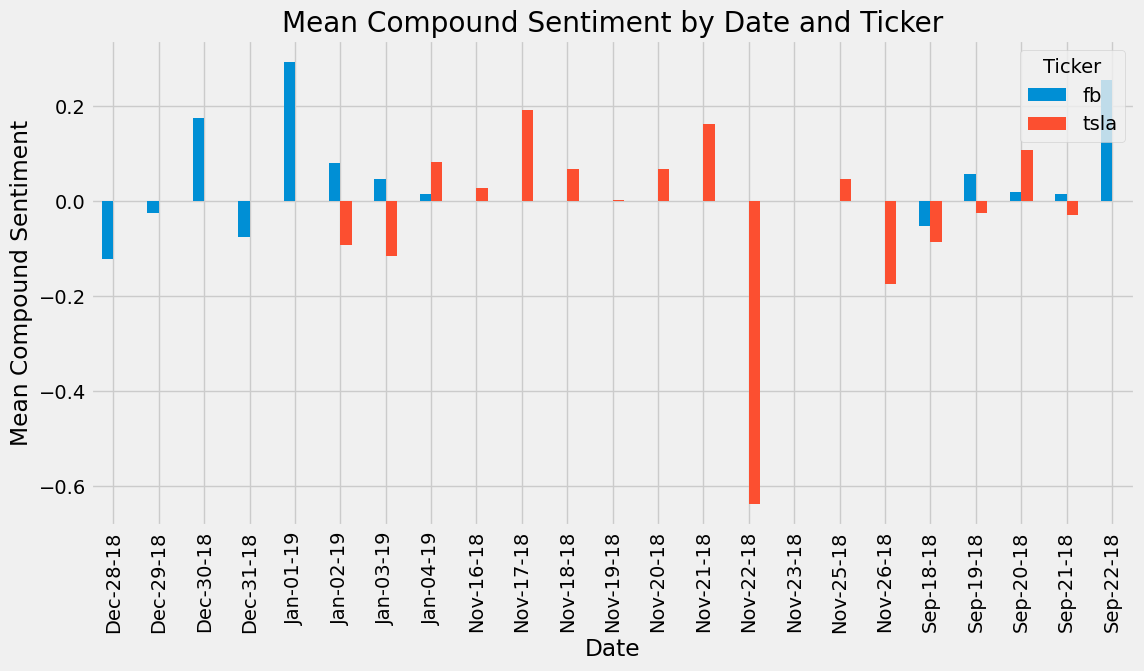

In [6]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker'])['compound'].mean()

# Unstack the column ticker
mean_c = mean_c.unstack(level='ticker')

# Plot a bar chart with pandas
mean_c.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Compound Sentiment by Date and Ticker')
plt.xlabel('Date')
plt.ylabel('Mean Compound Sentiment')
plt.legend(title='Ticker', loc='upper right')
plt.show()


#### Data Cleaning:
We clean the data by dropping duplicate headlines based on the ticker and headline. This step ensures that we have unique headlines for our analysis.

In [7]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['headline', 'ticker'])
# Count number of headlines after dropping duplicates (store as integer)
num_news_after = scored_news_clean.headline.count()
# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 500 headlines, now we have 476'

#### Selecting and Visualizing Sentiment for a Specific Date:
We select and visualize the sentiment for a specific date, such as January 3, 2019, for a specific stock, in this case, Facebook (FB)

In [8]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker','date'])
# Cross-section the fb row
single_day = single_day.xs('fb')
# Select the 3rd of January of 2019
single_day = single_day[single_day.index == 'Jan-03-19']
# Convert the datetime string to just the time
# Assuming the 'time' format is 'HH:MM:SS'
single_day['time'] = pd.to_datetime(single_day['time']).dt.time
# Set the index to time and sort by it
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()
single_day

/tmp/ipykernel_20/3893149210.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  single_day['time'] = pd.to_datetime(single_day['time']).dt.time


,headline,neg,neu,pos,compound
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.000,1.000,0.000,0.0000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.000,1.000,0.000,0.0000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.000,0.846,0.154,0.2500
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.000,1.000,0.000,0.0000
09:34:00,Apple warning stoking fears of slowdown in Chi...,0.426,0.574,0.000,-0.6369
09:48:00,"Stock Market News For Jan 3, 2019",0.000,1.000,0.000,0.0000
09:58:00,Facebook Falls 3%,0.981,0.019,0.000,-0.9993
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.000,0.784,0.216,0.2960
10:21:00,Facebook Under Fire for Collecting Data From A...,0.231,0.769,0.000,-0.3400


#### Sentiment Visualization:
We create a stacked bar chart to visualize the negative, neutral, and positive sentiments for that specific date and stock.

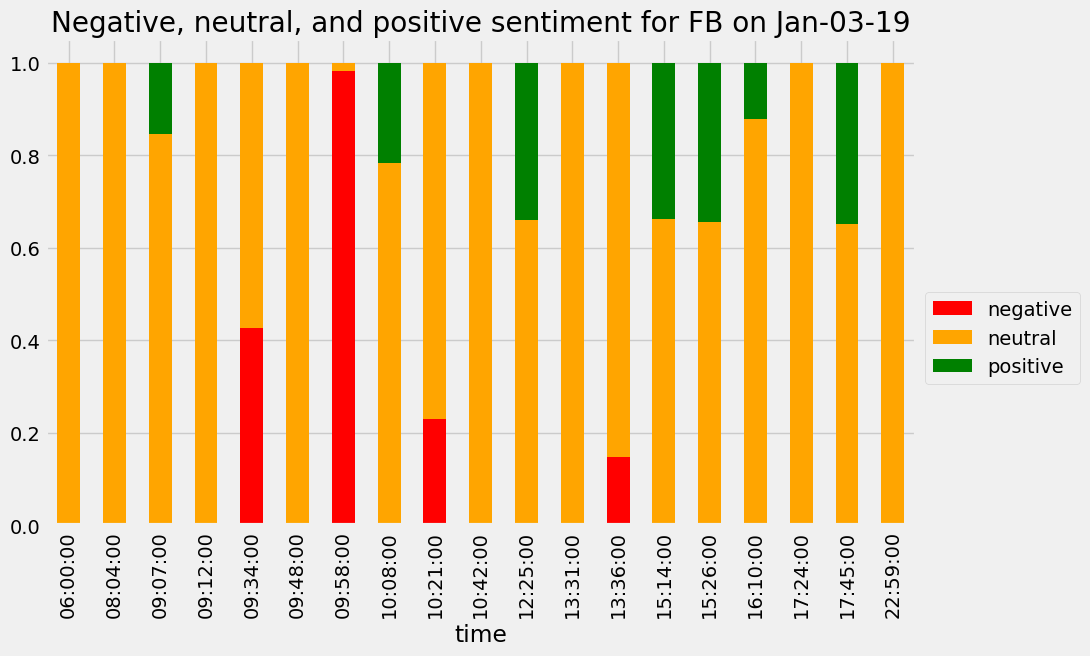

In [9]:
TITLE = "Negative, neutral, and positive sentiment for FB on Jan-03-19"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(columns=['compound','headline'])
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral','positive']

# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, 
                  figsize=(10, 6), 
                  title = TITLE, 
                  color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))

# Conclusion:
In conclusion, this project demonstrates the application of sentiment analysis to stock market news headlines. We successfully collected, processed, and analyzed the sentiment of headlines related to various stocks. The results are visualized to provide insights into sentiment trends for specific stocks and dates. This analysis can be valuable for traders and investors looking to gauge market sentiment.